# Домашнее задание 3

**Кругликов А. С.**

### 1 Реализуйте базовый частотный метод по Шерлоку Холмсу:
- подсчитайте частоты букв по корпусам (пунктуацию и капитализацию можно просто опустить, а вот пробелы лучше оставить);
- возьмите какие-нибудь тестовые тексты (нужно взять по меньшей мере 2-3 предложения, иначе вряд ли сработает), зашифруйте их посредством случайной перестановки символов;
- расшифруйте их таким частотным методом.

In [1]:
import re
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

In [116]:
with open('corpora/AnnaKarenina.txt', 'r', encoding='utf-8') as book:
    text = book.read().lower()
    
with open('corpora/WarAndPeace.txt', 'r', encoding='utf-8') as book:
    text += book.read().lower()
    
text = re.sub(r'[^\w]', ' ', text)
text = " ".join(text.split())

In [117]:
counter_map = Counter(text)
global_mapper = counter_map.most_common()
global_mapper[:10]

[(' ', 397300),
 ('о', 223691),
 ('е', 166169),
 ('а', 162313),
 ('н', 133258),
 ('и', 129712),
 ('т', 115258),
 ('с', 103252),
 ('л', 98191),
 ('в', 91386)]

In [118]:
def encode(text):
    chars = set(text)
    map_table = {char: chr(np.random.randint(0, 1000)) for char in chars}
    return ''.join([map_table[i] for i in text])

def decode(text, global_mapper):
    temp_counter = Counter(text).most_common()
    map_table = {temp_counter[i][0]: global_mapper[i][0] for i in range(len(temp_counter))}
    return ''.join([map_table[i] for i in text])

def accuracy(true, pred):
    return (np.array(list(true)) == np.array(list(pred))).mean()

In [123]:
test_text1 = text[82: 288]
test_text2 = text[188: 788]
test_text3 = text[886: 2588]
test_text1

' ставшей афоризмом фразой все счастливые семьи похожи друг на друга каждая несчастливая семья несчастлива по своему это книга о вечных ценностях о любви о вере о семье о человеческом достоинстве лев толстой'

In [202]:
test_text_enc1 = encode(test_text1)
test_text_enc2 = encode(test_text2)
test_text_enc3 = encode(test_text3)
test_text_enc1

'ˡñǆʍɺæʊ8ˡʍΪ©Ȁˠ<Ȃ©ȂˡΪȀʍ<©8ˡɺñʊˡñƘʍñǆɭˠɺƟʊˡñʊȂ͗ˠˡ(©ĥ©Ϥˠˡ̕ȀʅïˡĨʍˡ̕Ȁʅïʍˡ\u0381ʍϤ̕ʍǧˡĨʊñƘʍñǆɭˠɺʍǧˡñʊȂ͗ǧˡĨʊñƘʍñǆɭˠɺʍˡ(©ˡñɺ©ʊȂʅˡȭǆ©ˡ\u0381Ĩˠïʍˡ©ˡɺʊƘĨƟĥˡĭʊĨĨ©ñǆǧĥˡ©ˡɭέʥɺˠˡ©ˡɺʊȀʊˡ©ˡñʊȂ͗ʊˡ©ˡƘʊɭ©ɺʊƘʊñ\u0381©Ȃˡ̕©ñǆ©ˠĨñǆɺʊˡɭʊɺˡǆ©ɭñǆ©8'

In [129]:
test_text_dec1 = decode(test_text_enc1, global_mapper)
test_text_dec2 = decode(test_text_enc2, global_mapper)
test_text_dec3 = decode(test_text_enc3, global_mapper)
test_text_dec1

' атнихеп нзодсчвов зднчоп иае акнатрсиже аевяс йоьошс мдгы лн мдгын бншмну леакнатрсину аевяу леакнатрсин йо аиоевг тто блсын о иеклжь юеллоатуь о рэцис о иеде о аевяе о кероиекеабов моатослатие реи торатоп'

In [130]:
print(f"chars num: {len(test_text1)}, acc: {accuracy(test_text1, test_text_dec1)}")
print(f"chars num: {len(test_text2)}, acc: {accuracy(test_text2, test_text_dec2)}")
print(f"chars num: {len(test_text3)}, acc: {accuracy(test_text3, test_text_dec3)}")

chars num: 206, acc: 0.3932038834951456
chars num: 600, acc: 0.16
chars num: 1702, acc: 0.36427732079905994


In [127]:
text_len = []
acc = []
for size in range(100, 50000, 100):
    temp_text = text[10000: 10000 + size]
    temp_text_dec = decode(encode(temp_text), global_mapper)
    text_len.append(size)
    acc.append(accuracy(temp_text, temp_text_dec))

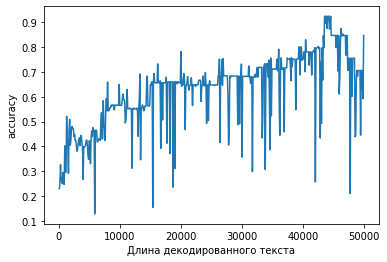

In [131]:
plt.plot(text_len, acc)
plt.xlabel('Длина декодированного текста')
plt.ylabel('accuracy')
plt.show()

**Точность метода растет с увеличением количества символов в целевом тексте, но результат неустойчивый и понять полученный текст не получается.**

## 2
Вряд ли в результате получилась такая уж хорошая расшифровка, разве что если вы брали в качестве тестовых данных целые рассказы. Но и Шерлок Холмс был не так уж прост: после буквы E, которая действительно выделяется частотой, дальше он анализировал уже конкретные слова и пытался угадать, какими они могли бы быть. Я не знаю, как запрограммировать такой интуитивный анализ, так что давайте просто сделаем следующий логический шаг:
- подсчитайте частоты биграмм (т.е. пар последовательных букв) по корпусам;
- проведите тестирование аналогично п.1, но при помощи биграмм.

В качестве естественной метрики качества можно взять долю правильно расшифрованных букв или, если хочется совсем математически изощриться, расстояние между двумя перестановками, правильной и полученной из модели; но, честно говоря, в этом задании следить за численными метриками не так уж обязательно, будет и глазами всё видно.

In [196]:
def get_bigrams(text):
    return [text[i: i + 2] for i in range(len(text) - 1)]

def decode(text, mapping):
    return "".join([mapping[symbol] for symbol in text])

In [249]:
def get_bigramm_mapper(encoded, real):  
    mapping_bigrams = {}
    already_mapped = []
    left_undecoded = []
    encoded_count = Counter(encoded).most_common()
    real_count = Counter(real).most_common()
    encoded_bigrams_count = Counter(get_bigrams(encoded)).most_common()
    real_bigrams_count = Counter(get_bigrams(real)).most_common()
    for enc, _ in encoded_bigrams_count:
        if enc[0] in mapping_bigrams and enc[1] in mapping_bigrams:
            continue
        elif enc[0] in mapping_bigrams:
            mapped = mapping_bigrams[enc[0]]
            ponential_symbols = [rea for rea, _ in real_bigrams_count if rea[0] == mapped and rea[1] not in already_mapped]
            if len(ponential_symbols) >= 1:
                mapping_bigrams[enc[1]] = ponential_symbols[0][1]
                already_mapped.append(ponential_symbols[0][1])
            else:
                if enc[0] not in left_undecoded:
                    left_undecoded.append(enc[1])
        elif enc[1] in mapping_bigrams:
            mapped = mapping_bigrams[enc[1]]
            ponential_symbols = [rea for rea, _ in real_bigrams_count if rea[1] == mapped and rea[0] not in already_mapped]
            if len(ponential_symbols) >= 1:
                mapping_bigrams[enc[0]] = ponential_symbols[0][0]
                already_mapped.append(ponential_symbols[0][0])
            else:
                if enc[0] not in left_undecoded:
                    left_undecoded.append(enc[0])
        else:
            ponential_symbols = [rea for rea, _ in real_bigrams_count if rea[1] not in already_mapped and rea[0] not in already_mapped]
            mapping_bigrams[enc[0]] = ponential_symbols[0][0]
            mapping_bigrams[enc[1]] = ponential_symbols[0][1]
            already_mapped.append(ponential_symbols[0][0])
            already_mapped.append(ponential_symbols[0][1])
    encoded_count = [symbol for symbol, count in encoded_count if symbol in left_undecoded]
    for i, encoded in enumerate(encoded_count):
        mapping_bigrams[encoded] = real_count[i][0]
    
    return mapping_bigrams

In [246]:
test_text_dec1 = decode(test_text_enc1, get_bigramm_mapper(test_text_enc1, text))
test_text_dec2 = decode(test_text_enc2, get_bigramm_mapper(test_text_enc2, text))
test_text_dec3 = decode(test_text_enc3, get_bigramm_mapper(test_text_enc3, text))

In [219]:
print(f"chars num: {len(test_text1)}, acc: {accuracy(test_text1, test_text_dec1)}")
print(f"chars num: {len(test_text2)}, acc: {accuracy(test_text2, test_text_dec2)}")
print(f"chars num: {len(test_text3)}, acc: {accuracy(test_text3, test_text_dec3)}")

chars num: 206, acc: 0.0
chars num: 600, acc: 0.045
chars num: 1702, acc: 0.2602820211515864


In [250]:
test_text_dec3

'я дто снхь пнгсля вто и але ку пкелтныно рочнт поглсаятьея е дткр л с нсгопн вто пгнбетлскт йоть зто акмибь побомаон m d р боетонсевко алйобкы с аосор горлан тоыетово овгораию пекйоыовкзневию глуглмотви бифк зныоснзневоо етглфаию выимкаи к екыи к вылсаон анмжслыжо боенын и але гнлыкур йибочнетснааово куомглчнакя s сгнря побтснгбкыо дти сжеовию ошнави ку етлтно к вакв ал сенй яужвлй ркгл поесяхнаажй лаан влгнакаоо рочао еоетлскть шныию мкмыкотнви я мну воынмлако алуслы лааи влгнакаи сныкзлофкр еошклыьажр горлаор со сено ркгосоо ыктнглтигн l пкелы торле рлаа уалзнакн горлал тоыетово еоетокт ан с детнткзневоо шнааоетк отбныьажй влгтка л с йибочнетснааоо улснгфнааоетк шныово ю сооаи к ркг тоыетоо алужслы ваквоо о пгофыор с алзлын ющэe вобл оа пгоекы гнблвтогл чигалыл гиеевко снетакв р а влтвосл с овылсынакк к блчн с омцясынакк ан алужслть нво еозканакн горлаор быя рная дто ознаь слчао к потори ознаь пгофи сле ом дтор эю э  тоыетоо ров мж омоеаослть есон опгнбнынакн члагл ваквл еежывоо ал 

**Кажется стало хуже**

## 3 МСМС
Но и это ещё не всё: биграммы скорее всего тоже далеко не всегда работают. Основная часть задания — в том, как можно их улучшить:
- предложите метод обучения перестановки символов в этом задании, основанный на MCMC-сэмплировании, но по-прежнему работающий на основе статистики биграмм;
- реализуйте и протестируйте его, убедитесь, что результаты улучшились.

In [263]:
def swap(decoded_symbols):
    new_decode = decoded_symbols.copy()
    left_id, right_id = np.random.choice(range(0, len(decoded_symbols)), size=2, replace=False)
    new_decode[left_id], new_decode[right_id] = new_decode[right_id], new_decode[left_id]
    return new_decode

def sum_of_probabilities(bigrams, mapa, log_likelihood, symbol_ids):
    return sum([count * log_likelihood[symbol_ids[mapa[bigram[0]]], symbol_ids[mapa[bigram[1]]]] for bigram, count in bigrams]) if bigrams else 0

def get_mcmc_mapper(encoded, real, n_iter):
    n_epoches = 30
    probs = []
    new_maps = []
    
    encoded_bigrams = Counter(get_bigrams(encoded)).most_common()
    decoded_bigrams = Counter(get_bigrams(real)).most_common()
    encoded_chars = list(set(encoded))
    decoded_chars = list(set(real))

    likelihood = np.ones((len(decoded_chars), len(decoded_chars)))
    symbol_ids = {symb: i for i, symb in enumerate(decoded_chars)}
    for bigram, count in decoded_bigrams:
        likelihood[symbol_ids[bigram[0]], symbol_ids[bigram[1]]] += count
    likelihood /= likelihood.sum()
    log_likelihood = np.log(likelihood)

    for _ in range(n_epoches):
        decoded_chars = list(set(real))
        start_map = dict(zip(encoded_chars, decoded_chars))
        prob = sum_of_probabilities(encoded_bigrams, start_map, log_likelihood, symbol_ids)

        for i in range(n_iter):
            new_decoded_chars = swap(decoded_chars)
            new_map = dict(zip(encoded_chars, new_decoded_chars))
            new_prob = sum_of_probabilities(encoded_bigrams, new_map, log_likelihood, symbol_ids)
            if new_prob > prob:
                decoded_chars = new_decoded_chars
                prob = new_prob
                start_map = new_map
            else:
                if np.exp(new_prob - prob) > np.random.rand():
                    decoded_chars = new_decoded_chars
                    prob = new_prob
                    start_map = new_map

        probs.append(prob)
        new_maps.append(start_map)
    
    return new_maps[np.argmax(probs)]

In [257]:
n_iter = 15000
test_text_dec1 = decode_text(test_text_enc1, get_mcmc_mapper(test_text_enc1, text, n_iter))
test_text_dec2 = decode_text(test_text_enc2, get_mcmc_mapper(test_text_enc2, text, n_iter))
test_text_dec3 = decode_text(test_text_enc3, get_mcmc_mapper(test_text_enc3, text, n_iter))

In [258]:
print(f"chars num: {len(test_text1)}, acc: {accuracy(test_text1, test_text_dec1)}")
print(f"chars num: {len(test_text2)}, acc: {accuracy(test_text2, test_text_dec2)}")
print(f"chars num: {len(test_text3)}, acc: {accuracy(test_text3, test_text_dec3)}")

chars num: 206, acc: 0.49029126213592233
chars num: 600, acc: 0.9866666666666667
chars num: 1702, acc: 0.9406580493537016


In [259]:
test_text_dec2

'по своему это книга о вечных фенностях о любви о вере о семье о человеческом достоинстве лев толстойроман широкого дыхания часть перваяц лев толстой анна каренина роман широкого дыхания анна каренина поразила современников вседневностью содержания необычайная свобода раскованность повествования удивительно сочетались в этом романе с фельностью художественного взгляда автора на жизнь он выступал здесь как художник и мыслитель и назначение искусства видел не в том чтобы неоспоримо разрешить вопрос а в том чтобы заставить любить жизнь в бесчисленных никогда не истощимых всех ее проявлениях ge eii'

## 4 Расшифровка сообщения

In [267]:
secrete_message_1 = '←⇠⇒↟↹↷⇊↹↷↟↤↟↨←↹↝⇛⇯↳⇴⇒⇈↝⇊↾↹↟⇒↟↹⇷⇛⇞↨↟↹↝⇛⇯↳⇴⇒⇈↝⇊↾↹↨←⇌⇠↨↹⇙↹⇸↨⇛↙⇛↹⇠⇛⇛↲⇆←↝↟↞↹⇌⇛↨⇛⇯⇊↾↹⇒←↙⇌⇛↹⇷⇯⇛⇞↟↨⇴↨⇈↹⇠⇌⇛⇯←←↹↷⇠←↙⇛↹↷⇊↹↷⇠←↹⇠↤←⇒⇴⇒↟↹⇷⇯⇴↷↟⇒⇈↝⇛↹↟↹⇷⇛⇒⇙⇞↟↨←↹↳⇴⇌⇠↟↳⇴⇒⇈↝⇊↾↹↲⇴⇒⇒↹⇰⇴↹⇷⇛⇠⇒←↤↝←←↹⇞←↨↷←⇯↨⇛←↹⇰⇴↤⇴↝↟←↹⇌⇙⇯⇠⇴↹↘⇛↨↞↹⇌⇛↝←⇞↝⇛↹↞↹↝↟⇞←↙⇛↹↝←↹⇛↲←⇆⇴⇏'
secrete_message_2 = 'დჳჵჂႨშႼႨშჂხჂჲდႨსႹႭჾႣჵისႼჰႨჂჵჂႨႲႹႧჲჂႨსႹႭჾႣჵისႼჰႨჲდႩჳჲႨჇႨႠჲႹქႹႨჳႹႹჱჶდსჂႽႨႩႹჲႹႭႼჰႨჵდქႩႹႨႲႭႹႧჂჲႣჲიႨჳႩႹႭდდႨშჳდქႹႨშႼႨშჳდႨჳხდჵႣჵჂႨႲႭႣშჂჵისႹႨჂႨႲႹჵჇႧჂჲდႨჾႣႩჳჂჾႣჵისႼჰႨჱႣჵჵႨეႣႨႲႹჳჵდხსდდႨႧდჲშდႭჲႹდႨეႣხႣსჂდႨႩჇႭჳႣႨႾႹჲႽႨႩႹსდႧსႹႨႽႨსჂႧდქႹႨსდႨႹჱდჶႣნ'

In [268]:
secrete_message_dec = decode_text(secrete_message_1, get_mcmc_mapper(secrete_message_1, text, n_iter=25000))
print(secrete_message_dec)

если вы вимите норжальный или подти норжальный текст у чтого сообщения который легко продитать скорее всего вы все смелали правильно и полудите жаксижальный балл за послемнее детвертое замание курса хотя конедно я нидего не обещаю
